The libraries that will be imported for this exercise.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
the_data = pd.read_csv("datasets/008ExerciseFile.csv")

In [5]:
display(the_data)

,rel_time,m_level
0,-10.000000,166.846602
1,-9.797980,243.656949
2,-9.595960,354.591642
3,-9.393939,209.023218
4,-9.191919,283.431508
...,...,...
95,9.191919,255.174991
96,9.393939,152.987761
97,9.595960,142.685158
98,9.797980,189.684193


Try a straight line and see if that works.

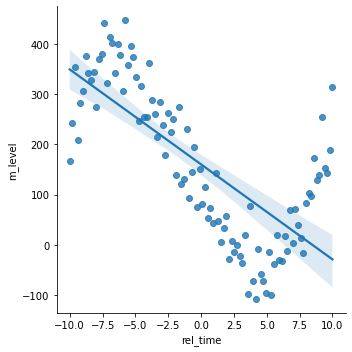

In [7]:
sns.lmplot(data=the_data, x = 'rel_time', y = 'm_level')

Showing residual plot to see if it is a good plot.

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

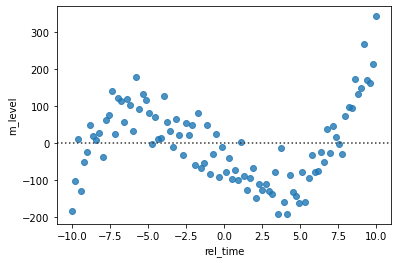

In [14]:
sns.residplot(data=the_data, x='rel_time', y='m_level')

#### From the graph above, it can be determined that the straight line is not a good description of the data. The data is not evenly distributed on the bottom and top. Due to this, the straight line is rejected. 

Trying to figure out which fit is efficient at describing the data. 

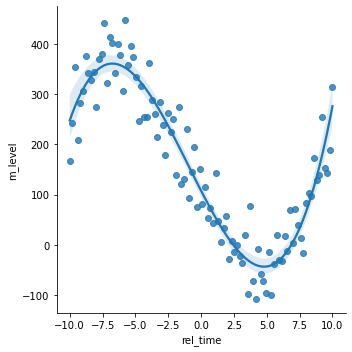

In [51]:
sns.lmplot(data = the_data, x = 'rel_time', y = 'm_level', 
           order = 3)

Looks like a degree of 3 is a good descriptor, but let's just make sure: 

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

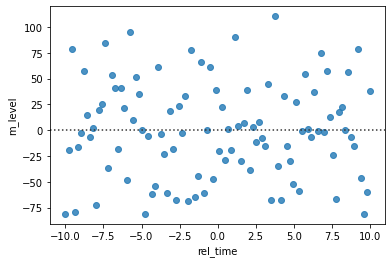

In [60]:
sns.residplot(data=the_data, x='rel_time', y='m_level', 
              order = 3)

As it can be seen above, the data is eveny distributed from the top to bottom. Due to this, it can be determined that a degree of 3 is a good polynomial that describes the data. We can also look at the residuals in-depth to make the conclusion have more evidence behind it.

In [61]:
the_fit = np.polyfit(x= the_data['rel_time'], 
                     y =the_data['m_level'],
                     deg = 3)
print(the_fit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


In [62]:
fit_values = np.polyval(the_fit, the_data['rel_time'])

In [63]:
residuals = the_data['m_level'] - fit_values

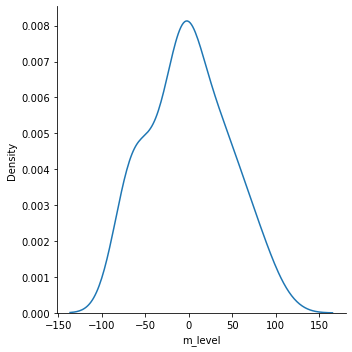

In [64]:
sns.displot(residuals, kind = 'kde')

Furthermore, the residuals are more Gausian, so the 3rd degree polynomial is a good descriptor of the data. 

In [65]:
# Standard Deviation of the residuals
np.std(residuals)

46.02814372678916

Making a pretty plot of the data. 

Text(0.5, 1.0, 'Relative Meltatonin Lvl vs. Time of Day')

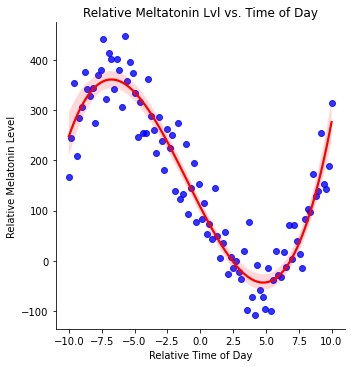

In [66]:
# creating the plot 
plot = sns.lmplot(data = the_data, x = 'rel_time', 
           y = 'm_level', 
           order = 3, scatter_kws = {'color': 'blue'},
           line_kws = {'color': 'red'})
#creating the axis titles and titiles
plt.xlabel("Relative Time of Day")
plt.ylabel("Relative Melatonin Level")
plt.title("Relative Meltatonin Lvl vs. Time of Day")




#### The equation of the line is.. 
y= 0.52406776x^3 +  1.5417871x^2  - 50.9901931x +  107.82613075